# Comparison of tail bounds on the sum of i.i.d. sub-Gaussian random variables

In [2]:
import numpy as np
from scipy.special import zeta
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def UB(n, ν, ɛ, α=1):
    """
    Tail bound resulting from convexity assumptions and a union bound
    """
    δ = ν/zeta(1+ɛ)
    return 2*np.sqrt(2)/α*np.sqrt(np.log(2*n**(1+ɛ)/δ)/n)

def LIL_jamieson(n, ν, ɛ=0.02):
    """
    Tail bound from Jamieson et al. (2014)
    """
    δ = np.log(1+ɛ)*(ɛ*ν/(2+ɛ))**(1/(1+ɛ))
    return (1+np.sqrt(ɛ))*np.sqrt(2*(1+ɛ)*np.log(np.log((1+ɛ)*n)/δ)/n)

def laplace(n, ν):
    """
    Tail bound from Maillard (2019)
    """
    δ = ν
    return np.sqrt(2*(1+1/n)*np.log(np.sqrt(n+1)/δ)/n)

def stitched(n, ν, η=2., s=1.4):
    """
    Tail bound from Theorem 1, Howard et al. (2019)
    """
    δ = ν/2
    k_1 = (η**(1/4) + η**(-1/4))/np.sqrt(2)
    return k_1*np.sqrt(s*np.log(np.log(η*n)) + np.log(zeta(s)/(δ*np.log(η)**s)))/np.sqrt(n)

def M_estimator_LIL(n, ν, σ=1., α=1.):
    """
    Our bound
    """
    return (3.4*σ/α)*np.sqrt((np.log(np.log(2*n)) + 0.72*np.log(10.4/ν))/n)

In [3]:
sns.set_style("white", {'ytick.left':True, 'xtick.bottom':True})

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

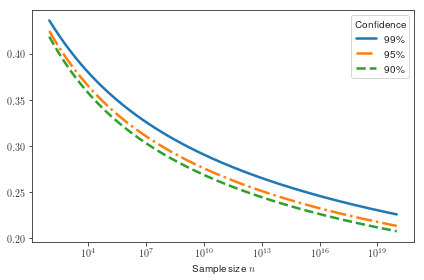

In [5]:
# Stitched bound from Howard et al. versus union bound
ɛ = 0.2

ν = 0.01
plt.semilogx(n, stitched(n, ν)/UB(n, ν, ɛ), linewidth=2.5)

ν = 0.05
plt.semilogx(n, stitched(n, ν)/UB(n, ν, ɛ), linestyle='-.', linewidth=2.5)

ν = 0.1
plt.semilogx(n, stitched(n, ν)/UB(n, ν, ɛ), linestyle='--', linewidth=2.5)

plt.legend(title="Confidence", labels=['99\%', '95\%', '90\%'])

plt.xlabel('Sample size $n$')
plt.tight_layout()
savefig('experiments_results/stitched_UB_ratio.pdf', dpi=500, bb_inches='tight')

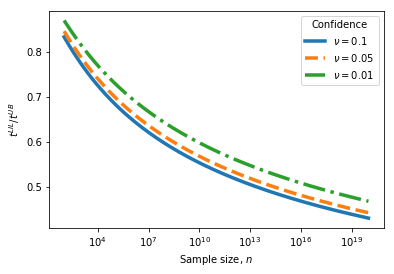

In [4]:
# our bound versus union bound
n = np.logspace(2, 20, 200)
ɛ = 0.1

ν = 0.1
plt.semilogx(n, M_estimator_LIL(n, ν)/UB(n, ν, ɛ), label=r"$\nu = 0.1$", linewidth=3.5)
ν = 0.05
plt.semilogx(n, M_estimator_LIL(n, ν)/UB(n, ν, ɛ), label=r"$\nu = 0.05$", linewidth=3.5, linestyle='--')
ν = 0.01
plt.semilogx(n, M_estimator_LIL(n, ν)/UB(n, ν, ɛ), label=r"$\nu = 0.01$", linewidth=3.5, linestyle='-.')

plt.xlabel('Sample size, $n$')
plt.ylabel(r'$t^{LIL}/t^{UB}$')

plt.legend(title='Confidence')
savefig('experiments_results/our_lil_vs_union_bound.pdf', dpi=500)